<a href="https://colab.research.google.com/github/Katie0731/stats_DL/blob/main/chapter07_working-with-keras%20(w7%EA%B0%95%EC%9D%98%2052%EB%B6%84%EA%B9%8C%EC%A7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Working with Keras: A deep dive

## A spectrum of workflows

## Different ways to build Keras models

### The Sequential model

**The `Sequential` class**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# sequential model = list of layer dense

In [3]:
model.layers   # 2 dense of model

**Incrementally building a Sequential model**

In [8]:
model = keras.Sequential()

In [5]:
model.layers

[]

In [9]:
model.add(layers.Dense(64, activation="relu"))
model.layers

In [10]:
model.add(layers.Dense(10, activation="softmax"))
model.layers

# incrementally add

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

# using model.add()

**Calling a model for the first time to build it**

In [11]:
model.weights   # input_shape 없으면 오류 뜸

ValueError: ignored

In [12]:
model.build(input_shape=(None, 3))
model.weights   # initial weights are randomly set.

[<tf.Variable 'dense_6/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.22436899,  0.16929731, -0.08716094, -0.24926123,  0.25961155,
          0.22367567,  0.21810853,  0.2824661 ,  0.2966228 ,  0.21698666,
         -0.06622212, -0.21538976,  0.09831163,  0.09199268,  0.17529571,
         -0.00922409,  0.24063164, -0.23972772,  0.06095803, -0.26356077,
          0.10472456, -0.25369453,  0.24972916,  0.04213601, -0.22423941,
         -0.16345952,  0.17952454,  0.08371115, -0.2651977 ,  0.13539517,
         -0.21598522,  0.23979366, -0.00796115, -0.28952965,  0.1155476 ,
         -0.01722291,  0.061566  ,  0.29012084,  0.2860101 ,  0.2909367 ,
          0.10277042,  0.0838438 ,  0.16749159, -0.25542802,  0.11964977,
         -0.15396504,  0.06925553, -0.18992722,  0.26518613,  0.1055434 ,
          0.2840429 , -0.01645038,  0.25563747,  0.0494312 , -0.2510141 ,
         -0.15177168, -0.26022434, -0.13949078, -0.21792445, -0.05950369,
          0.03358957,  0.19539478,  0.23213

In [13]:
len(model.weights)

# (2 dense) x (each dense : w, b -> 2)

4

In [14]:
model.weights[0]   # 3x64

<tf.Variable 'dense_6/kernel:0' shape=(3, 64) dtype=float32, numpy=
array([[ 0.22436899,  0.16929731, -0.08716094, -0.24926123,  0.25961155,
         0.22367567,  0.21810853,  0.2824661 ,  0.2966228 ,  0.21698666,
        -0.06622212, -0.21538976,  0.09831163,  0.09199268,  0.17529571,
        -0.00922409,  0.24063164, -0.23972772,  0.06095803, -0.26356077,
         0.10472456, -0.25369453,  0.24972916,  0.04213601, -0.22423941,
        -0.16345952,  0.17952454,  0.08371115, -0.2651977 ,  0.13539517,
        -0.21598522,  0.23979366, -0.00796115, -0.28952965,  0.1155476 ,
        -0.01722291,  0.061566  ,  0.29012084,  0.2860101 ,  0.2909367 ,
         0.10277042,  0.0838438 ,  0.16749159, -0.25542802,  0.11964977,
        -0.15396504,  0.06925553, -0.18992722,  0.26518613,  0.1055434 ,
         0.2840429 , -0.01645038,  0.25563747,  0.0494312 , -0.2510141 ,
        -0.15177168, -0.26022434, -0.13949078, -0.21792445, -0.05950369,
         0.03358957,  0.19539478,  0.23213524, -0.075462

In [15]:
model.weights[1]   # 64x1

<tf.Variable 'dense_6/bias:0' shape=(64,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [16]:
model.weights[2]   # 64x10

<tf.Variable 'dense_7/kernel:0' shape=(64, 10) dtype=float32, numpy=
array([[ 0.1910964 ,  0.04363793,  0.103937  ,  0.23558292, -0.03363511,
         0.03524271,  0.23213187, -0.05814597, -0.05388655, -0.01369241],
       [ 0.17811227,  0.07448593, -0.13391119, -0.16700391, -0.2443479 ,
         0.12661678,  0.12811339, -0.15171733,  0.16884243,  0.24848083],
       [-0.20438173, -0.1426221 ,  0.06268653,  0.08847657, -0.07784045,
        -0.18105173, -0.20406768, -0.11102971,  0.09443688, -0.12683368],
       [-0.11872521,  0.20282397, -0.1376774 , -0.22689661,  0.24054179,
        -0.10626704,  0.08666319, -0.00736099,  0.19912386,  0.28102115],
       [ 0.01723012, -0.23991162,  0.17446485,  0.18625012, -0.17412534,
         0.23964092,  0.26244703,  0.08382711,  0.09096876,  0.00112247],
       [ 0.2556719 , -0.20954165, -0.21663517,  0.22489998,  0.10308385,
         0.11111534, -0.06247023, -0.20131615,  0.24173787,  0.21873501],
       [ 0.18545201, -0.01404184, -0.13794564, -0

In [17]:
model.weights[3]   # 10x1

<tf.Variable 'dense_7/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

**The summary method**

In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**Naming models and layers with the `name` argument**

In [19]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

# 이름바꾸기

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**Specifying the input shape of your model in advance**

In [20]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))   # sequentially 할 때 input data 넣는 방법 (2???)
model.add(layers.Dense(64, activation="relu"))

In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                256       
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### The Functional API

#### A simple example

**A simple Functional model with two `Dense` layers**

In [23]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [26]:
inputs = keras.Input(shape=(3,), name="my_input")

In [27]:
inputs.shape

TensorShape([None, 3])

In [28]:
inputs.dtype

tf.float32

In [29]:
features = layers.Dense(64, activation="relu")(inputs)

In [30]:
features.shape

TensorShape([None, 64])

In [31]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [32]:
model.summary()   # 앞에서 한 예시랑 결과는 똑같음 + 뒤에서 심화내용 배울거임

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_12 (Dense)            (None, 64)                256       
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### Multi-input, multi-output models

**A multi-input, multi-output Functional model**

In [33]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

# 3 different inputs

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])  # 3 input을 1 vector로 묶는 법
features = layers.Dense(64, activation="relu")(features)

# 2 different outputs

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [34]:
model.summary()

# concatenate -> 인풋 묶은 벡터

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

#### Training a multi-input, multi-output model

**Training a model by providing lists of input & target arrays**

In [35]:
import numpy as np

num_samples = 1280

# randomly generate dummy (input) data set

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 5ms/step - loss: 24.8096 - priority_loss: 0.3159 - department_loss: 24.4936 - priority_mean_absolute_error: 0.4838 - department_accuracy: 0.5742


In [37]:
title_data

array([[1, 1, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       ...,
       [0, 1, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 0, 1]])

In [38]:
title_data.shape

(1280, 10000)

**Training a model by providing dicts of input & target arrays**

In [39]:
# compile은 output에 대하여
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})

# model fit을 dictionnary 형식으로!!
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)

model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 5ms/step - loss: 21.5620 - priority_loss: 0.3159 - department_loss: 21.2461 - priority_mean_absolute_error: 0.4838 - department_accuracy: 0.1086


In [40]:
training_d1 = {"title": title_data, "text_body": text_body_data, "tags": tags_data}

In [41]:
training_d1

{'tags': array([[0, 0, 0, ..., 0, 1, 1],
        [0, 0, 1, ..., 0, 1, 1],
        [1, 0, 1, ..., 0, 1, 0],
        ...,
        [0, 1, 1, ..., 1, 1, 1],
        [0, 0, 1, ..., 0, 0, 1],
        [1, 1, 1, ..., 1, 1, 0]]), 'text_body': array([[0, 0, 1, ..., 0, 1, 1],
        [1, 0, 1, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [1, 0, 1, ..., 0, 0, 0],
        [0, 1, 1, ..., 1, 0, 1],
        [1, 1, 1, ..., 1, 1, 0]]), 'title': array([[1, 1, 1, ..., 0, 1, 0],
        [1, 1, 0, ..., 1, 1, 0],
        [0, 0, 1, ..., 0, 1, 0],
        ...,
        [0, 1, 1, ..., 0, 1, 1],
        [0, 1, 1, ..., 0, 1, 1],
        [1, 1, 1, ..., 0, 0, 1]])}

In [ ]:
model.fit(training_d1,
          {"priority": priority_data, "department": department_data},
          epochs=1)
#이렇게 간단하게 적어도 돼!

#### The power of the Functional API: Access to layer connectivity

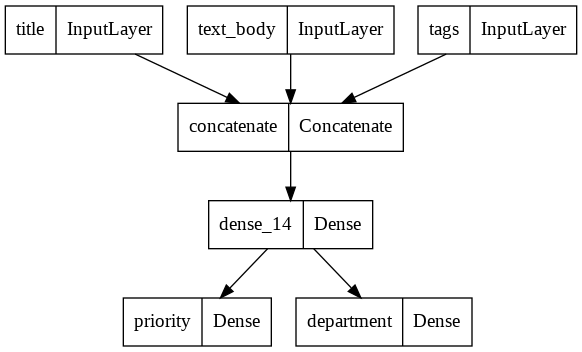

In [42]:
keras.utils.plot_model(model, "ticket_classifier.png")

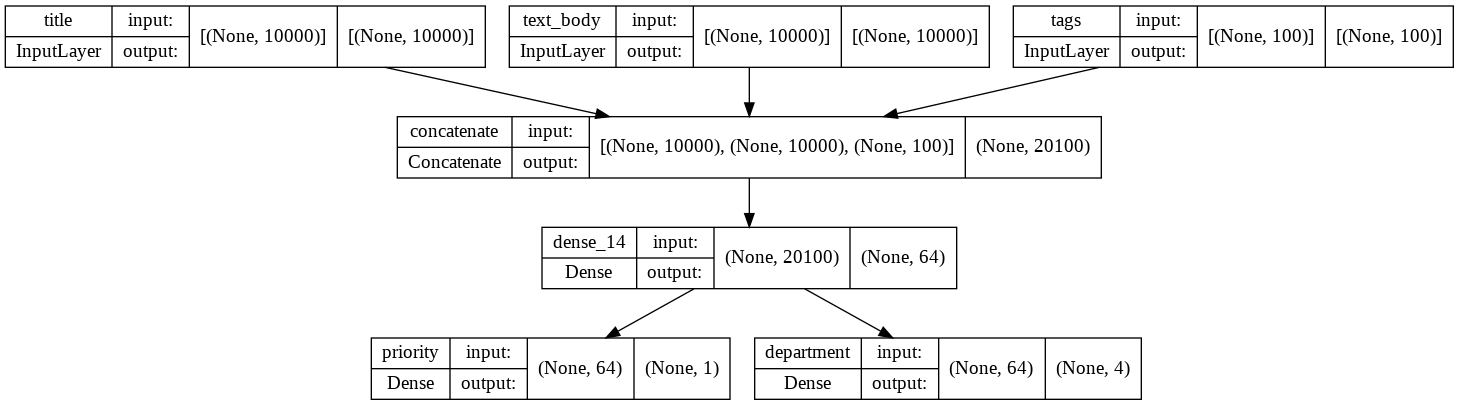

In [43]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)
# 더 자세한 정보를 알고싶으면 show_shapes=True!

**Retrieving the inputs or outputs of a layer in a Functional model**

In [44]:
model.layers 

In [45]:
model.layers[3].input  # 4th layer concatenate everything!

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [46]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

**Creating a new model by reusing intermediate layer outputs**

In [47]:
features = model.layers[4].output  # 5th layer에 output 추가
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

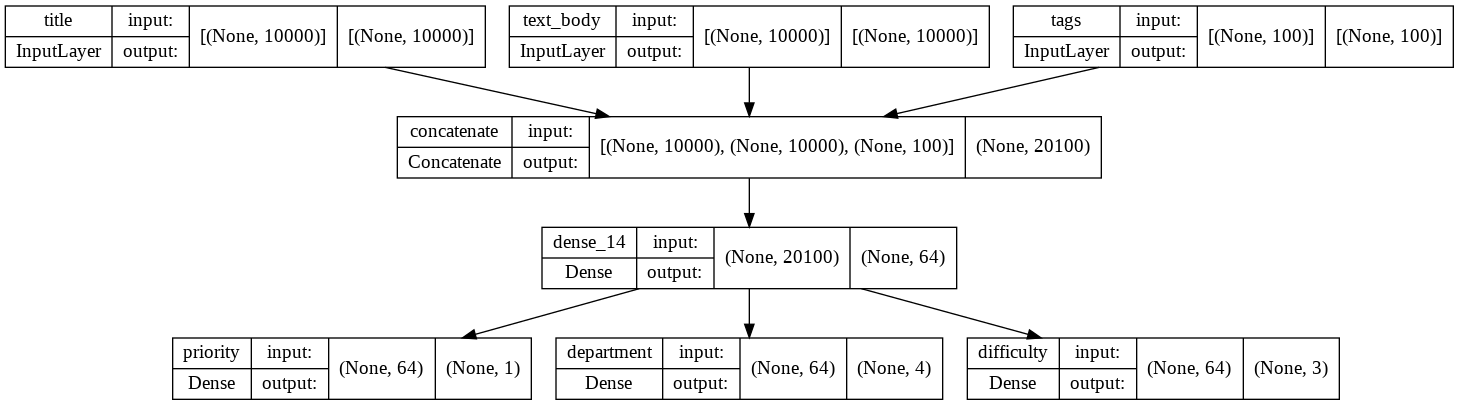

In [48]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

### Subclassing the Model class

#### Rewriting our previous example as a subclassed model

**A simple subclassed model**

In [49]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):   # class의 input data = num_departments
        super().__init__()  ## subclass 모델 만들 때 필요, 아래 줄은 layer을 define함
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):  # define inputs
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])

        features = self.mixing_layer(features)   # output 64 dense
        
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [50]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})  # dictionnary 형태로

In [51]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 0s 5ms/step - loss: 13.8851 - output_1_loss: 0.3159 - output_2_loss: 13.5692 - output_1_mean_absolute_error: 0.4838 - output_2_accuracy: 0.2328


#### Beware: What subclassed models don't support

### Mixing and matching different components

**Creating a Functional model that includes a subclassed model**

In [ ]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

**Creating a subclassed model that includes a Functional model**

In [ ]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

### Remember: Use the right tool for the job

## Using built-in training and evaluation loops

**The standard workflow: `compile()`, `fit()`, `evaluate()`, `predict()`**

In [ ]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

### Writing your own metrics

**Implementing a custom metric by subclassing the `Metric` class**

In [ ]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [ ]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

### Using callbacks

#### The EarlyStopping and ModelCheckpoint callbacks

**Using the `callbacks` argument in the `fit()` method**

In [ ]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

In [ ]:
model = keras.models.load_model("checkpoint_path.keras")

### Writing your own callbacks

**Creating a custom callback by subclassing the `Callback` class**

In [ ]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

In [ ]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### Monitoring and visualization with TensorBoard

In [ ]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="/full_path_to_your_log_dir",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /full_path_to_your_log_dir

## Writing your own training and evaluation loops

### Training versus inference

### Low-level usage of metrics

In [ ]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

In [ ]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

### A complete training and evaluation loop

**Writing a step-by-step training loop: the training step function**

In [ ]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

**Writing a step-by-step training loop: resetting the metrics**

In [ ]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

**Writing a step-by-step training loop: the loop itself**

In [ ]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

**Writing a step-by-step evaluation loop**

In [ ]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

### Make it fast with tf.function

**Adding a `tf.function` decorator to our evaluation-step function**

In [ ]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

### Leveraging fit() with a custom training loop

**Implementing a custom training step to use with `fit()`**

In [ ]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

In [ ]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

## Summary